In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from typing import NamedTuple
from functools import partial
import math
import json

In [35]:
import xylo
import xylo.types as t
import xylo.cut
import xylo.slicer as s
import xylo.database
import xylo.sweep as xs

In [10]:
note = 61

In [18]:
db = xylo.database.get()
bar = db.get_bar(note)
best = db.get_best(note)
spline = jnp.array(best['coeff'])
with open(f"data/gcode/{note}.json", 'w') as f:
  json.dump(best, f)

In [19]:
# spline = [0.8618183457492242, 0.10249491254184383, 0.6796106365369823, 0.6894492655492203, 0.3909279734013816, 0.7317539174703496]
# spline = jnp.array([ 0.81393585, -0.00699588,  0.63882503,  0.65606331,  0.37536516, 0.79187227])
# spline = jnp.array([0.5, 0.3, 0.5, 1.0])

# sections = xylo.cut.spline(bar, spline)
sections = [xylo.cut.spline(bar, xylo.cut.spline_scale(spline, i)) for i in jnp.arange(0.2, 1.01, 0.2)]
# sections2 = xylo.cut.spline(bar, xylo.cut.spline_scale(spline, 0.5))

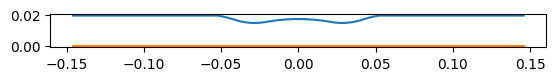

In [20]:
sections[-1].plot()
# sections2.plot()

In [34]:
prev = None
i = 1
for ss in sections:
  o = s.slicer8.outline(bar, ss)
  s.slicer8.path_topdown(bar, o, prev, cut_width = 3).write(f'data/gcode/topdown-{note}-{i}.ngc')
  prev = o
  i = i + 1


In [37]:
wood = db.get_wood(note)
for s in sections:
    swp = xs.sweep(wood, bar, s, t.sweep_default)
    print(i, swp.harmonics, swp.harmonics / swp.harmonics[0])

6 [1054.0885546  2712.78384815 4731.24524507] [1.         2.57358249 4.48847037]
6 [1011.93308722 2707.39452624 4799.12490554] [1.         2.67546793 4.74253186]
6 [ 969.62778857 2696.28991535 4882.92933051] [1.         2.78074736 5.03588015]
6 [ 927.02513972 2678.01644391 4983.39755313] [1.         2.88882828 5.37568761]
6 [ 883.95593872 2650.94490356 5100.77491357] [1.         2.99895593 5.77039498]
